# Simple LArQuality query example

First, do our imports for ServiceX to function (this with the xAOD backend). Also, matplotlib so we can plot things.

In [1]:
import servicex
from servicex import ServiceXDataset
from func_adl_servicex import ServiceXDatasetSource
import matplotlib.pyplot as plt

Here, we will retrieve the actual LArQuality from a Monte Carlo dataset. We only pull from jets that have a pt > 20 GeV and a eta < 4.5 GeV.

In [7]:
dataset = ServiceXDataset("mc16_13TeV:mc16_13TeV.364700.Pythia8EvtGen_A14NNPDF23LO_jetjet_JZ0WithSW.deriv.DAOD_JETM1.e7142_s3126_r9364_p4128")
query = ServiceXDatasetSource(dataset) \
    .SelectMany('lambda e: e.Jets("AntiKt4EMTopoJets")') \
    .Where('lambda j: j.pt()/1000>20 and abs(j.eta()/1000)<4.5') \
    .Select('lambda j: j.getAttributeFloat("LArQuality")') \
    .AsPandasDF("JetMoment") \
    .value()

Finally, we plot it. LArQuality seems to be a ratio of some kind, so presumably it's unitless. I don't really know any of the physics here.

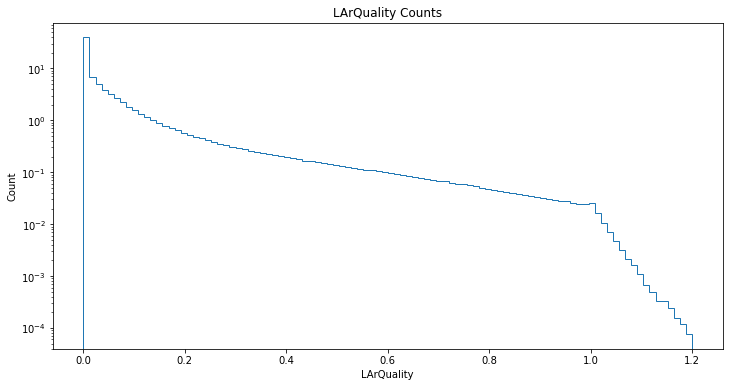

In [11]:
plt.figure(figsize=(12, 6))
plt.hist(query.JetMoment, bins=100, range=(0,1.20), density=True, histtype = 'step')
plt.yscale('log')
plt.title('LArQuality Counts')
plt.xlabel('LArQuality')
plt.ylabel('Count')
plt.show()